# Getting Started

In [15]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Load the MNIST dataset and split train/test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data to the value range [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

In [17]:
# Show shape of the training and test data
print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (60000, 28, 28), y_train = (60000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


Image shape after being resized:  (32, 32)


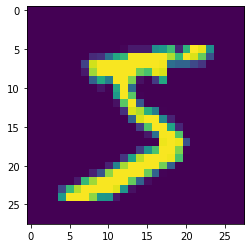

In [18]:
# Install OpenCV library to process images.
# !pip3 install opencv-python

### Resize an image
import cv2
resized_img = cv2.resize(X_train[0], dsize=(32,32)) # Resize the first sample in the training set to 32x32.
print("Image shape after being resized: ", resized_img.shape)

# Show an image
plt.imshow(X_train[0,:,:])
plt.show()

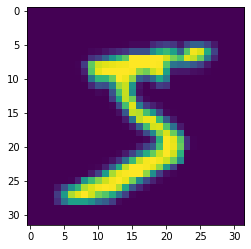

In [19]:
#create a new empty array to store resized images
resized_X_train = np.empty((X_train.shape[0], 32, 32), dtype=np.float32)

resized = cv2.resize(X_train[0], (32,32))
#plt.imshow(resized)
resized_X_train[0,:,:] = resized

plt.imshow(resized_X_train[0,:,:])

In [20]:
#create a new empty array to store resized images
resized_X_train = np.empty((X_train.shape[0], 32, 32), dtype=np.float32)
resized_X_test = np.empty((X_test.shape[0], 32, 32), dtype=np.float32)
# Loop through each image in the array and resize it
for i, image in enumerate(X_train):
    resized = cv2.resize(image, (32, 32))
    resized_X_train[i] = resized

for i, image in enumerate(X_test):
    resized = cv2.resize(image, (32, 32))
    resized_X_test[i] = resized
    
print(resized_X_train.shape)
print(resized_X_test.shape)

(60000, 32, 32)
(10000, 32, 32)


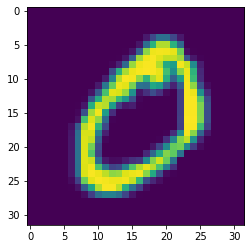

In [21]:
# Show an image
plt.imshow(resized_X_train[1,:,:])
plt.show()

In [22]:
# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(resized_X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Val shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(resized_X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (54000, 32, 32), y_train = (54000,)
Val shape: X_val = (6000, 32, 32), y_val = (6000,)
Test shape: X_test = (10000, 32, 32), y_test = (10000,)


# Build VGG16 model

In [23]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Initialize AlexNet as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
VGG16 = Sequential(name='VGG16')

#Block 1
VGG16.add(Conv2D(filters=64, input_shape=(32,32,1), kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_1_Conv_1')) # padding="same" means input and output have the same spatial dimension.
VGG16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_1_Conv_2'))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_1_MaxPool'))

#Block 2
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_2_Conv_1'))
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_2_Conv_2'))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_2_MaxPool'))

#Block 3
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_3_Conv_1'))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_3_Conv_2'))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_3_Conv_3'))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_3_MaxPool'))

#Block 4
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_4_Conv_1'))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_4_Conv_2'))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_4_Conv_3'))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_4_MaxPool'))

#Block 5
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_5_Conv_1'))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_5_Conv_2'))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1), padding='same', activation='relu', name='Block_5_Conv_3'))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_5_MaxPool'))

# Flatten
VGG16.add(Flatten())

# Fully connected (FC) layer 1
VGG16.add(Dense(4096, activation = 'relu'))
VGG16.add(Dropout(rate=0.2)) # Dropout with drop rate. This is to force the layer to learn general features.

# Fully connected (FC) layer 2
VGG16.add(Dense(4096))
VGG16.add(BatchNormalization())
VGG16.add(Activation('relu'))
VGG16.add(Dropout(rate=0.3))


# Fully connected (FC) layer 3
VGG16.add(Dense(1000))
VGG16.add(BatchNormalization())
VGG16.add(Activation('relu'))
VGG16.add(Dropout(rate=0.35))

#Softmax Layer
VGG16.add(Dense(10)) # Number of output classes
VGG16.add(Activation('softmax'))

#Model Summary
VGG16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Block_1_Conv_1 (Conv2D)     (None, 32, 32, 64)        640       
                                                                 
 Block_1_Conv_2 (Conv2D)     (None, 32, 32, 64)        36928     
                                                                 
 Block_1_MaxPool (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 Block_2_Conv_1 (Conv2D)     (None, 16, 16, 128)       73856     
                                                                 
 Block_2_Conv_2 (Conv2D)     (None, 16, 16, 128)       147584    
                                                                 
 Block_2_MaxPool (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                         

In [24]:
# Compile the model
VGG16.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train

In [25]:
### Create a callback ModelCheckpoint: this callback will save a better version of model every time the optimizer finds one. 
#### filepath: path to save the better model.
#### monitor: metrics to identify how a model is considered to be better.
#### mode='auto'/'max'/'min': to tell if the larger/smaller the metric, the better the model.
#### verbose: output log.
#### save_best_only: only save the best model instead off all better models along the training.

# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
mc = keras.callbacks.ModelCheckpoint(filepath="epoch-{epoch:02d}.hdf5", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better. 
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history = VGG16.fit(X_train, y_train, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=30, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training

Epoch 1/30
106/106 [==============================] - 27s 201ms/step - loss: 0.4501 - accuracy: 0.8465 - val_loss: 2.2578 - val_accuracy: 0.1442
Epoch 2/30
106/106 [==============================] - 21s 201ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 2.1395 - val_accuracy: 0.1755
Epoch 3/30
106/106 [==============================] - 22s 204ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 1.8587 - val_accuracy: 0.4930
Epoch 4/30
106/106 [==============================] - 22s 206ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 1.0113 - val_accuracy: 0.9260
Epoch 5/30
106/106 [==============================] - 22s 207ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.2143 - val_accuracy: 0.9773
Epoch 6/30
106/106 [==============================] - 22s 207ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.2128 - val_accuracy: 0.9263
Epoch 7/30
106/106 [==============================] - 22s 205ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0931 - val_ac

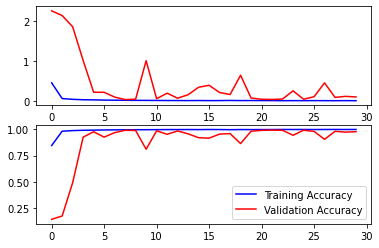

In [26]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [27]:
# Let us load a saved model and evaluate its performance on the test set
model = tf.keras.models.load_model("/content/epoch-07.hdf5")
result = VGG16.evaluate(resized_X_test, y_test) # If unspecified, batch_size will default to 32

313/313 [==============================] - 3s 9ms/step - loss: 0.0952 - accuracy: 0.9770


In [28]:
# Show the model performance
print(VGG16.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in AlexNet.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.09519246965646744, accuracy = 0.9769999980926514
